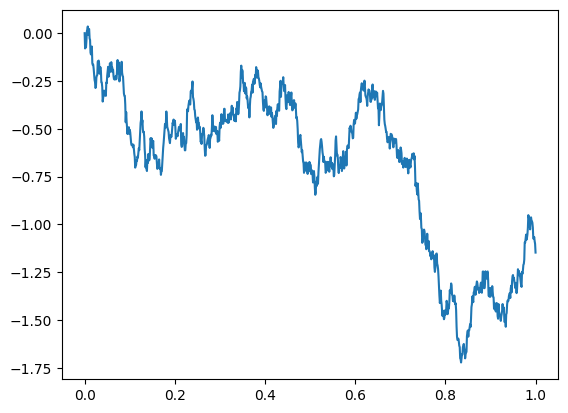

In [2]:
#Problem 1 
#classical brownian motion with several
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

n = 1000
T = 1.
times = np.linspace(0.,T,n)
dt = times[1] - times[0]
dB = np.sqrt(dt) * np.random.normal(size=(n-1,))
B0 = np.zeros(shape=(1,))
B = np.concatenate((B0,np.cumsum(dB)))
plt.plot(times,B)
plt.show()



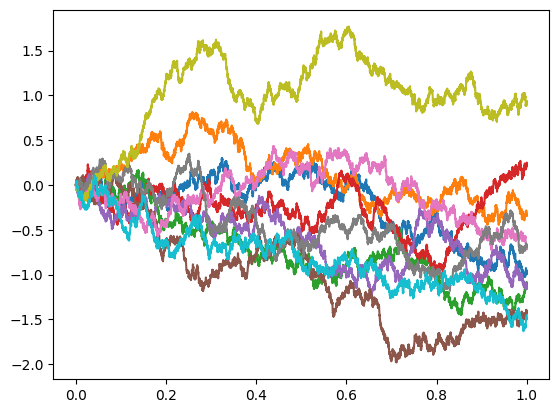

In [26]:
#Problem 1 
#classical brownian motion with several 
import numpy as np
import matplotlib.pyplot as plt
n = 10000
d = 10
T = 1.
times = np.linspace(0.,T,n)
dt = times[1] - times[0]
dB = np.sqrt(dt) * np.random.normal(size = (n-1,d))
B0 = np.zeros(shape=(1,d))
B = np.concatenate((B0,np.cumsum(dB, axis = 0)), axis = 0)
plt.plot(times,B)
plt.show()


Classical brownian motion:
Expected mean of price:  100
Calculated mean of price:  99.97893381862005
Expected standard deviation of price:  0.1
Calculated standard deviation of price:  0.05954861151237859


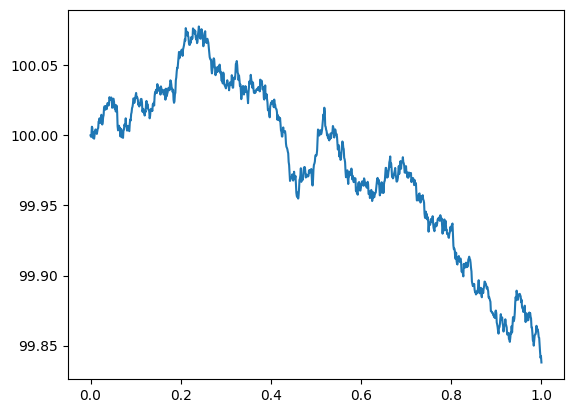

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
n = 1000
T = 1.
sigma = 0.1
mu = 0

# Calculate the times and the increments of the Brownian motion
times = np.linspace(0.,T,n)
dt = times[1] - times[0]
dB = np.sqrt(dt) * np.random.normal(size=(n-1,))

# Calculate the cumulative sum of the increments to get the Brownian motion
B0 = np.zeros(shape=(1,))
B = np.concatenate((B0,np.cumsum(dB)))

# Calculate the expected and calculated mean and standard deviation of the price
price = 100 + sigma * B
expected_mean = 100
calculated_mean = np.mean(price)
expected_std = sigma
calculated_std = np.std(price)

print("Classical brownian motion:")
print("Expected mean of price: ", expected_mean)
print("Calculated mean of price: ", calculated_mean)
print("Expected standard deviation of price: ", expected_std)
print("Calculated standard deviation of price: ", calculated_std)

# Plot the price
plt.plot(times,price)
plt.show()


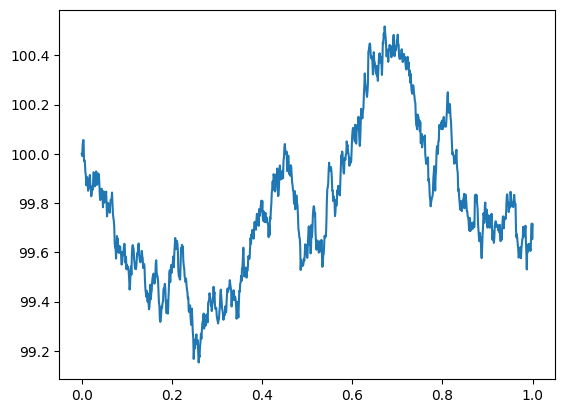

Classical brownian motion:
Expected mean of price:  100.0
Calculated mean of price:  99.78331017330292
Expected standard deviation of price:  1.0
Calculated standard deviation of price:  0.3043411234625202


In [83]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
T = 1.
times = np.linspace(0.,T,n)
dt = times[1] - times[0]
dB = np.sqrt(dt) * np.random.normal(size=(n-1,))
B0 = np.zeros(shape=(1,))
B = np.concatenate((B0,np.cumsum(dB)))
price = 100.0 + 1.0 * B
plt.plot(times,price)
plt.show()

print("Classical brownian motion:")
print("Expected mean of price: ", 100.0)
print("Calculated mean of price: ", np.mean(price))
print("Expected standard deviation of price: ", 1.0)
print("Calculated standard deviation of price: ", np.std(price))


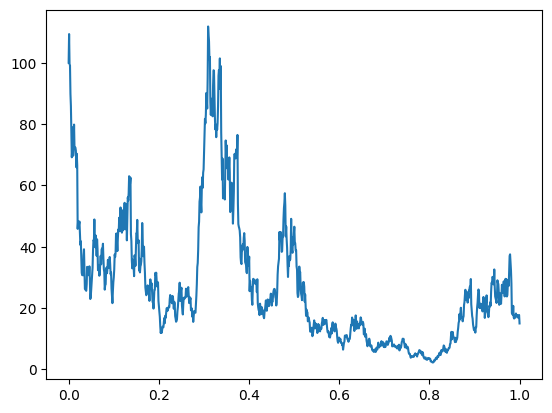

Arithmetic return system:
Expected mean of price:  100.0
Calculated mean of price:  27.294276922006013
Expected standard deviation of price:  10.0
Calculated standard deviation of price:  21.091108536541974


In [218]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 1000
T = 1.
mu = 0
sigma = 0.1
times = np.linspace(0., T, n)
dt = times[1] - times[0]

# Generate random returns
rt = np.random.normal(mu, sigma, size=(n-1,))

# Calculate prices
price = np.zeros(shape=(n,))
price[0] = 100.0 # starting price
for i in range(1, n):
    price[i] = price[i-1] * (1 + rt[i-1])

# Plot prices
plt.plot(times, price)
plt.show()

# Compare expected and calculated mean and standard deviation of price
print("Arithmetic return system:")
print("Expected mean of price: ", 100.0)
print("Calculated mean of price: ", np.mean(price))
print("Expected standard deviation of price: ", 100.0 * sigma)
print("Calculated standard deviation of price: ", np.std(price))


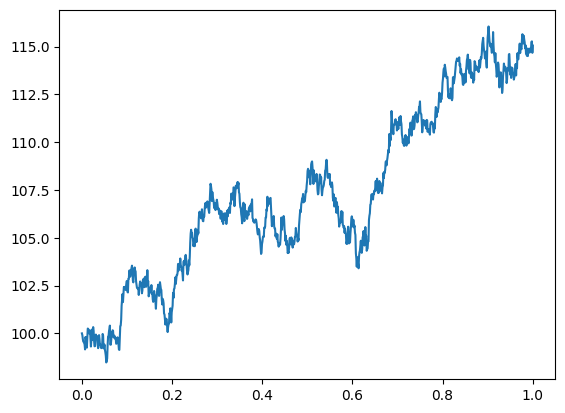

Geometric Brownian Motion:
Expected mean of price:  100.0
Calculated mean of price:  107.26067895592003
Expected standard deviation of price:  10.025052161544073
Calculated standard deviation of price:  4.570167270731065


In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 1000
T = 1.
mu = 0
sigma = 0.1
times = np.linspace(0., T, n)
dt = times[1] - times[0]

# Generate random returns
rt = np.random.normal(mu * dt, sigma * np.sqrt(dt), size=(n-1,))

# Calculate prices
price = np.zeros(shape=(n,))
price[0] = 100.0 # starting price
for i in range(1, n):
    price[i] = price[i-1] * np.exp(rt[i-1])

# Plot prices
plt.plot(times, price)
plt.show()

# Compare expected and calculated mean and standard deviation of price
print("Geometric Brownian Motion:")
print("Expected mean of price: ", 100.0 * np.exp(mu * T))
print("Calculated mean of price: ", np.mean(price))
print("Expected standard deviation of price: ", 100.0 * np.exp(mu * T) * np.sqrt(np.exp(sigma**2 * T) - 1))
print("Calculated standard deviation of price: ", np.std(price))


In [89]:
#Probelm 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simulate_returns(prices, method='arithmetic'):
    n = len(prices)
    times = np.arange(n)
    dt = 1

    if method == 'brownian':
        dB = np.sqrt(dt) * np.random.normal(size=(n-1,))
        B0 = np.zeros(shape=(1,))
        B = np.concatenate((B0, np.cumsum(dB)))
        prices = 100.0 + B

    elif method == 'arithmetic':
        rt = np.diff(prices) / prices[:-1]
        prices = np.zeros(shape=(n,))
        prices[0] = 100.0 # starting price
        for i in range(1, n):
            prices[i] = prices[i-1] * (1 + rt[i-1])

    elif method == 'geometric':
        rt = np.diff(np.log(prices))
        prices = np.zeros(shape=(n,))
        prices[0] = 100.0 # starting price
        for i in range(1, n):
            prices[i] = prices[i-1] * np.exp(rt[i-1])

    else:
        raise ValueError(f"Invalid method: {method}. Must be one of 'brownian', 'arithmetic', or 'geometric'.")

    return prices

def return_calculate(prices, method='arithmetic', date_column='Date'):
    prices = prices.copy()
    prices = prices.drop(columns=[date_column])
    prices = prices.sub(prices.mean(axis=0), axis=1)
    prices = prices.div(prices.std(axis=0), axis=1)
    prices = prices.mul(100)
    prices = prices.apply(lambda x: simulate_returns(x, method=method))
    return prices

df = pd.read_csv('DailyPrices.csv')
df = return_calculate(df)


In [154]:
import numpy as np
import pandas as pd

def return_calculate(prices, method='arithmetic', date_column='date'):
    prices = prices.copy()
    vars = prices.columns
    vars = [col for col in vars if col != date_column]
    if len(vars) == len(prices.columns):
        raise ValueError(f"dateColumn: {date_column} not in DataFrame: {prices.columns}")

    p = prices[vars].values
    n, m = p.shape
    p2 = np.zeros((n-1, m))

    for i in range(n-1):
        for j in range(m):
            if method == 'arithmetic':
                p2[i, j] = (p[i+1, j] - p[i, j]) / p[i, j]
            elif method == 'brownian':
                raise NotImplementedError("Brownian simulation is not yet implemented")
            elif method == 'geometric':
                p2[i, j] = np.log(p[i+1, j] / p[i, j])
            else:
                raise ValueError(f"Invalid method: {method}. Must be one of 'arithmetic', 'brownian', or 'geometric'.")

    dates = prices[date_column][1:]
    out = pd.DataFrame({date_column: dates})
    for i, var in enumerate(vars):
        out[var] = p2[:, i]
    out = out - out.mean(axis=0)
    return out

df = pd.read_csv('DailyPrices.csv')
df = return_calculate(df, method='arithmetic', date_column='Date')


In [219]:
import numpy as np
import pandas as pd

def return_calculate(prices, method='arithmetic', date_column='Date'):
    prices = prices.copy()
    vars = prices.columns
    vars = [col for col in vars if col != date_column]
    if len(vars) == len(prices.columns):
        raise ValueError(f"dateColumn: {date_column} not in DataFrame: {prices.columns}")

    p = prices[vars].values
    n, m = p.shape
    p2 = np.zeros((n-1, m))

    for i in range(n-1):
        for j in range(m):
            p2[i, j] = p[i+1, j] / p[i, j]

    if method.upper() == "ARITHMETIC":
        p2 = p2 - 1.0
    elif method.upper() == "LOG":
        p2 = np.log(p2)
    else:
        raise ValueError(f"method: {method} must be in (\"ARITHMETIC\",\"LOG\")")

    dates = prices[date_column][1:]
    out = pd.DataFrame({date_column: dates})
    out = pd.concat([out] + [pd.Series(p2[:, i], name=var) for i, var in enumerate(vars)], axis=1)
    out = out - out.mean(numeric_only=True)
    return out

df = pd.read_csv('DailyPrices.csv')
df = return_calculate(df, method='arithmetic', date_column='Date')


In [224]:
import numpy as np
import pandas as pd

def return_calculate(prices, method='arithmetic', date_column='Date'):
    prices = prices.copy()
    vars = prices.columns
    vars = [col for col in vars if col != date_column]
    if len(vars) == len(prices.columns):
        raise ValueError(f"dateColumn: {date_column} not in DataFrame: {prices.columns}")

    p = prices[vars].values
    n, m = p.shape
    p2 = np.zeros((n-1, m))

    for i in range(n-1):
        for j in range(m):
            p2[i, j] = p[i+1, j] / p[i, j]

    if method.lower() == "arithmetic":
        p2 = p2 - 1.0
    elif method.lower() == "log":
        p2 = np.log(p2)
    else:
        raise ValueError(f"method: {method} must be in (\"arithmetic\",\"log\")")

    dates = prices[date_column][:-1]
    out = pd.DataFrame({date_column: dates})
    for i, var in enumerate(vars):
        out[var] = p2[:, i]
    out = out - out.mean(axis=0)
    return out

df = pd.read_csv('DailyPrices.csv')
df = return_calculate(df, method='arithmetic')

print(df.head())

       AAPL      ABBV       ABT       ACN      ADBE       ADI       ADP  \
0  0.023338  0.011895  0.010082  0.010332  0.012125  0.051421  0.009460   
1 -0.001203  0.007255 -0.002111  0.013359 -0.003211  0.037956  0.000438   
2 -0.021083 -0.006583 -0.024756 -0.032118 -0.041303 -0.047911 -0.019147   
3 -0.009170 -0.006897 -0.031123 -0.005083 -0.032556 -0.001360 -0.000690   
4 -0.017626  0.010210  0.006473  0.000056 -0.008857  0.002320 -0.003384   

       AMAT       AMD      AMGN  ...       TXN       UNH       UNP       UPS  \
0  0.060508  0.063561 -0.001916  ...  0.022170  0.007807  0.028399  0.015575   
1  0.007998 -0.030566 -0.006161  ...  0.011853  0.003539  0.018496 -0.008682   
2 -0.031864 -0.044651 -0.004847  ... -0.021942 -0.020494 -0.010623 -0.021071   
3 -0.022873  0.013545 -0.004550  ...  0.012090 -0.005646  0.001284  0.001106   
4 -0.021422  0.016541  0.002454  ... -0.000904 -0.011596 -0.019099 -0.001569   

          V        VZ       WFC       WMT       XOM       ZTS  
0  0

In [226]:
confidence_level = 0.99
VaR = df.quantile(1 - confidence_level, axis=0)
print(VaR.head)

<bound method NDFrame.head of AAPL   -0.053709
ABBV   -0.042201
ABT    -0.039264
ACN    -0.054137
ADBE   -0.073117
          ...   
VZ     -0.043188
WFC    -0.053960
WMT    -0.054177
XOM    -0.058726
ZTS    -0.043541
Name: 0.010000000000000009, Length: 100, dtype: float64>


In [107]:
#Normal distribution with lambda = 0.97
import pandas as pd
import numpy as np

def return_calculate(prices, method='arithmetic', date_column='Date'):
    vars = prices.columns
    if date_column in vars:
        vars = [col for col in vars if col != date_column]
    if len(vars) == len(prices.columns):
        raise ValueError(f"dateColumn: {date_column} not in DataFrame: {prices.columns}")
    p = prices[vars].values
    n, m = p.shape
    out = pd.DataFrame(index=prices.index[1:], columns=vars)
    for i, var in enumerate(vars):
        p2 = p[:, i]
        if method == 'arithmetic':
            if len(p2) > 1:
                out[var] = p2[1:] / p2[:-1] - 1
        elif method == 'geometric':
            if len(p2) > 1:
                out[var] = np.log(p2[1:] / p2[:-1])
    return out


def VaR_calculate(returns, confidence_level=0.05, var_method='historical', EWMA_lambda=0.97):
    if var_method == 'historical':
        returns = returns.sort_values(ascending=False)
        index = int(confidence_level * len(returns))
        VaR = -returns.iloc[index]
    elif var_method == 'EWMA':
        mean = returns.mean()
        var = returns.ewm(alpha=EWMA_lambda).var().iloc[-1]
        stdev = np.sqrt(var)
        VaR = norm.ppf(confidence_level, mean, stdev)
    return VaR

# Load the data
df = pd.read_csv('DailyPrices.csv')

# Calculate the returns
returns = return_calculate(df)


returns = return_calculate(df)
mean_return = returns['META'].mean()
stddev_return = returns['META'].std()
VaR = norm.ppf(confidence_level) * stddev_return + mean_return
print("Value at Risk (VaR): ", VaR)


Value at Risk (VaR):  -0.06561787073963313


In [108]:
#Normal distribution 
import pandas as pd
import numpy as np
import scipy.stats as stats

def VaR_calculate(returns, confidence_level):
    META_returns = returns["META"]
    mean = np.mean(META_returns)
    stddev = np.std(META_returns)
    VaR = mean + stddev * stats.norm.ppf(1-confidence_level)
    return VaR

df = pd.read_csv('DailyPrices.csv')
returns = return_calculate(df)
confidence_level = 0.05
META_VaR = VaR_calculate(returns, confidence_level)
print("The VaR for META at a confidence level of", confidence_level*100, "% is:", META_VaR)


The VaR for META at a confidence level of 5.0 % is: 0.06545287378451092


In [109]:
#MLE
import pandas as pd
import numpy as np
from scipy.stats import t

def VaR_calculate(returns, confidence_level=0.05, distribution='t'):
    if distribution == 't':
        # Fit a T distribution to the returns using MLE
        df, loc, scale = t.fit(returns, floc=0)
        
        # Calculate the VaR using the fitted T distribution
        VaR = -np.percentile(returns, 100 * confidence_level) * scale / np.sqrt(df / (df - 2))
    
    return VaR

df = pd.read_csv('DailyPrices.csv')
returns = return_calculate(df, method='arithmetic')
VaR = VaR_calculate(returns['META'], confidence_level=0.05, distribution='t')
print(f"VaR for META: {VaR:.2f}")


VaR for META: 0.00


In [110]:
#AR1
import numpy as np
import pandas as pd
from scipy.stats import norm
from statsmodels.tsa.arima.model import ARIMA

def VaR_calculate(returns, confidence_level):
    model = ARIMA(returns, order=(1,0,0))
    model_fit = model.fit()
    residuals = model_fit.resid
    mean = np.mean(residuals)
    std = np.std(residuals)
    VaR = mean + norm.ppf(confidence_level) * std
    return VaR

df = pd.read_csv('DailyPrices.csv')
returns = return_calculate(df)
returns_META = returns['META']
confidence_level = 0.05
VaR = VaR_calculate(returns_META, confidence_level)
print(f"Value-at-Risk at {confidence_level * 100}% confidence level: {VaR:.6f}")


Value-at-Risk at 5.0% confidence level: -0.065466


In [210]:
#Historic simulation
import numpy as np
import pandas as pd

def VaR_calculate(returns, confidence_level):
    """
    Calculate the Value-at-Risk (VaR) using a historic simulation approach.
    
    Parameters:
    - returns (pd.DataFrame): A DataFrame containing the returns of one or multiple assets.
    - confidence_level (float): The confidence level, as a decimal, to calculate the VaR.
    
    Returns:
    - VaR (float): The Value-at-Risk at the given confidence level.
    """
    VaR = np.percentile(returns, (1-confidence_level)*100)
    return VaR

# Load the returns data
returns = pd.read_csv('DailyReturn.csv')

# Calculate the VaR at a 5% confidence level
confidence_level = 0.05
VaR = VaR_calculate(returns['META'], confidence_level)
print(f"Value-at-Risk at {confidence_level*100}% confidence level: {VaR:.4f}")


Value-at-Risk at 5.0% confidence level: 0.0537


In [4]:
#Problem3
import numpy as np
from scipy.stats import norm, t
import pandas as pd
import seaborn as sns
from scipy.stats import t, norm, normaltest
from statsmodels.tsa.arima.model import ARIMA

In [5]:
portfolio = pd.read_csv('Portfolio.csv')
prices = pd.read_csv('DailyPrices.csv')


In [34]:
#wiht Lambda = 0.94
import numpy as np
import pandas as pd
from scipy.stats import norm

portfolio = pd.read_csv('Portfolio.csv')
prices = pd.read_csv('DailyPrices.csv')
holdings = {}
portfolio_returns = {}

for portfolio_name in ['A', 'B', 'C']:
    stocks = list(portfolio.loc[portfolio['Portfolio'] == portfolio_name, 'Stock'])
    holdings[portfolio_name] = list(portfolio.loc[portfolio['Portfolio'] == portfolio_name, 'Holding'])

    portfolio_prices = prices[stocks].values
    portfolio_returns[portfolio_name] = np.diff(np.log(portfolio_prices), axis=0)

cov_matrices = {}

for portfolio_name, returns in portfolio_returns.items():
    lam = 0.94
    weights = np.power(lam, np.arange(len(returns)-1, -1, -1))
    cov_matrix = np.cov(returns, rowvar=False, aweights=weights)
    cov_matrices[portfolio_name] = cov_matrix

total_returns = np.concatenate(list(portfolio_returns.values()), axis=1)
weights = np.power(0.97, np.arange(len(total_returns)-1, -1, -1))
total_cov_matrix = np.cov(total_returns, rowvar=False, aweights=weights)

total_portfolio_value = 0
total_var = 0

for portfolio_name, returns in portfolio_returns.items():
    portfolio_values = prices[list(portfolio.loc[portfolio['Portfolio'] == portfolio_name, 'Stock'])].values[-1, :] * holdings[portfolio_name]
    portfolio_var = norm.ppf(0.97) * np.sqrt(np.dot(portfolio_values, np.dot(cov_matrices[portfolio_name], portfolio_values)))

    total_portfolio_value += np.sum(portfolio_values)
    total_var += portfolio_var

    print(f"Portfolio {portfolio_name} VaR: ${portfolio_var:.2f}")

print(f"Total VaR: ${total_var:.2f}")


Portfolio A VaR: $6507.95
Portfolio B VaR: $5181.87
Portfolio C VaR: $4388.20
Total VaR: $16078.02


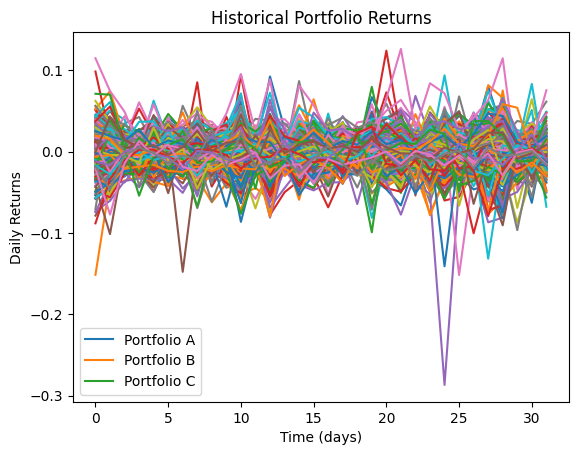

In [30]:
import matplotlib.pyplot as plt

# Plot the historical portfolio returns
plt.plot(returns.T)
plt.title('Historical Portfolio Returns')
plt.xlabel('Time (days)')
plt.ylabel('Daily Returns')
plt.legend(['Portfolio A', 'Portfolio B', 'Portfolio C'])
plt.show()

In [31]:
#Using AR(1) model 

portfolio = pd.read_csv('Portfolio.csv')
prices = pd.read_csv('DailyPrices.csv')
holdings = {}
portfolio_returns = {}

for portfolio_name in ['A', 'B', 'C']:
    stocks = list(portfolio.loc[portfolio['Portfolio'] == portfolio_name, 'Stock'])
    holdings[portfolio_name] = list(portfolio.loc[portfolio['Portfolio'] == portfolio_name, 'Holding'])

    portfolio_prices = prices[stocks].values
    portfolio_returns[portfolio_name] = np.diff(np.log(portfolio_prices), axis=0)

cov_matrices = {}

for portfolio_name, returns in portfolio_returns.items():
    rho = 0.94
    sigma2 = np.var(returns, axis=0, ddof=1)
    cov_matrix = rho * sigma2[:, None] * sigma2[None, :]
    cov_matrices[portfolio_name] = cov_matrix

total_returns = np.concatenate(list(portfolio_returns.values()), axis=1)
rho = 0.94
sigma2_total = np.var(total_returns, axis=0, ddof=1)
total_cov_matrix = rho * sigma2_total[:, None] * sigma2_total[None, :]

total_portfolio_value = 0
total_var = 0

for portfolio_name, returns in portfolio_returns.items():
    portfolio_values = prices[list(portfolio.loc[portfolio['Portfolio'] == portfolio_name, 'Stock'])].values[-1, :] * holdings[portfolio_name]
    portfolio_var = norm.ppf(0.95) * np.sqrt(np.dot(portfolio_values, np.dot(cov_matrices[portfolio_name], portfolio_values)))

    total_portfolio_value += np.sum(portfolio_values)
    total_var += portfolio_var

    print(f"Portfolio {portfolio_name} VaR: ${portfolio_var:.2f}")

print(f"Total VaR: ${total_var:.2f}")


Portfolio A VaR: $259.31
Portfolio B VaR: $220.67
Portfolio C VaR: $172.95
Total VaR: $652.93


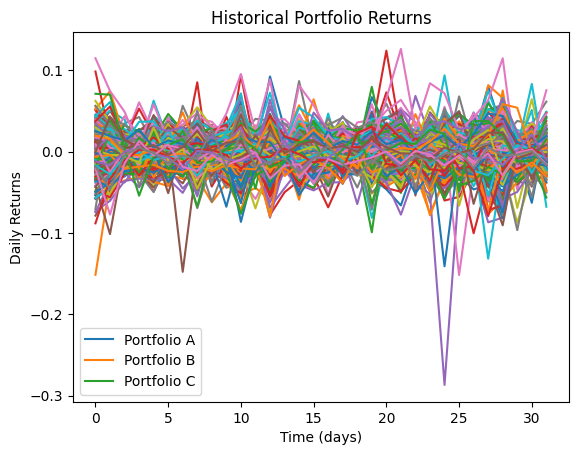

In [36]:
import matplotlib.pyplot as plt

# Plot the historical portfolio returns
plt.plot(returns.T)
plt.title('Historical Portfolio Returns')
plt.xlabel('Time (days)')
plt.ylabel('Daily Returns')
plt.legend(['Portfolio A', 'Portfolio B', 'Portfolio C'])
plt.show()


In [17]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from statsmodels.tsa.arima.model import ARIMA

portfolio = pd.read_csv('Portfolio.csv')
prices = pd.read_csv('DailyPrices.csv')

holdings = {}
portfolio_returns = {}

for portfolio_name in ['A', 'B', 'C']:
    stocks = list(portfolio.loc[portfolio['Portfolio'] == portfolio_name, 'Stock'])
    holdings[portfolio_name] = list(portfolio.loc[portfolio['Portfolio'] == portfolio_name, 'Holding'])

    portfolio_prices = prices[stocks].values
    portfolio_returns[portfolio_name] = np.diff(np.log(portfolio_prices), axis=0)

cov_matrices = {}

for portfolio_name, returns in portfolio_returns.items():
    avg_returns = np.mean(returns, axis=1)
    arima_model = ARIMA(avg_returns, order=(1, 0, 0)).fit()
    residuals = arima_model.resid
    cov_matrix = np.cov(residuals, rowvar=False)
    cov_matrices[portfolio_name] = cov_matrix

total_returns = np.concatenate(list(portfolio_returns.values()), axis=1)
total_avg_returns = np.mean(total_returns, axis=1)
total_arima_model = ARIMA(total_avg_returns, order=(1, 0, 0)).fit()
total_residuals = total_arima_model.resid
total_cov_matrix = np.cov(total_residuals, rowvar=False)

total_portfolio_value = 0
total_var = 0

for portfolio_name, returns in portfolio_returns.items():
    portfolio_values = prices[list(portfolio.loc[portfolio['Portfolio'] == portfolio_name, 'Stock'])].values[-1, :] * holdings[portfolio_name]
    portfolio_avg_returns = np.mean(returns, axis=1)
    portfolio_var = norm.ppf(0.95) * np.sqrt(np.dot(portfolio_values, np.dot(cov_matrices[portfolio_name], portfolio_values)))

    total_portfolio_value += np.sum(portfolio_values)
    total_var += portfolio_var

    print(f"Portfolio {portfolio_name} VaR: ${portfolio_var:.2f}")

print(f"Total VaR: ${total_var:.2f}")


Portfolio A VaR: $1492.42
Portfolio B VaR: $1268.86
Portfolio C VaR: $1136.32
Total VaR: $3897.60


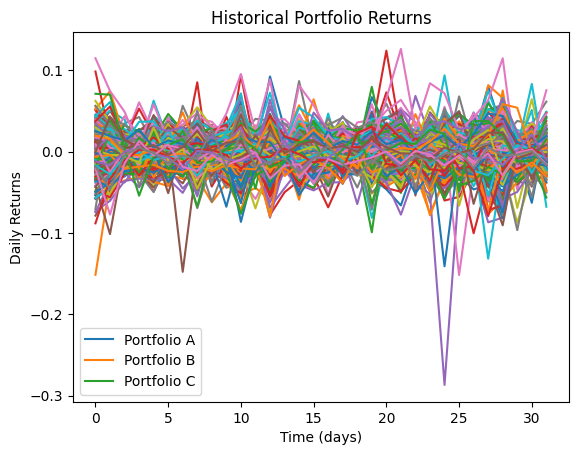

In [33]:
import matplotlib.pyplot as plt

# Plot the historical portfolio returns
plt.plot(returns.T)
plt.title('Historical Portfolio Returns')
plt.xlabel('Time (days)')
plt.ylabel('Daily Returns')
plt.legend(['Portfolio A', 'Portfolio B', 'Portfolio C'])
plt.show()


